# Guided Project: Analyzing CIA Factbook Data Using SQLite and Python

## Overview of the Data

In [1]:
#Import pandas and sqlite3.
import pandas as pd
import sqlite3

#Connect to factbook.db and use pandas.read_sql_query() to return information on the tables in the database.
conn=sqlite3.connect("factbook.db")

#Query 1 
q1="SELECT * FROM sqlite_master WHERE type='table';"

#Return query 1 results in nested tuples (This table only shows first 3 rows)
cursor=conn.cursor()
conn.execute(q1).fetchall()



[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [2]:
#Return query 1 results in a table (This table only shows first 3 rows)
pd.read_sql_query(q1,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
#Query 2
q2="SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary Statistics

In [4]:
# Query 3 Minimum Population
q3="SELECT MIN(population) FROM facts"

# Query 4 Maximum Population
q4="SELECT MAX(population) FROM facts"

# Query 5 Minimum population growth
q5="SELECT MIN(population_growth) FROM facts"

# Query 6 Maximum population growth
q6="SELECT MAX(population_growth) FROM facts"

q=[q3,q4,q5,q6]

for i in q:
    print(pd.read_sql_query(i,conn))

   MIN(population)
0                0
   MAX(population)
0       7256490011
   MIN(population_growth)
0                     0.0
   MAX(population_growth)
0                    4.02


## Exploring Outliers

In [5]:
#Query 7 Return the countrie(s) with a population of 0
q7="SELECT * FROM facts WHERE population=0"
print(pd.read_sql_query(q7,conn))

#Query 8 Return the countrie(s) with a population of 7256490011
q8="SELECT * FROM facts WHERE population=7256490011"
print(pd.read_sql_query(q8,conn))


    id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None     280000       None           0   

  population_growth birth_rate death_rate migration_rate  
0              None       None       None           None  
    id code   name  area area_land area_water  population  population_growth  \
0  261   xx  World  None      None       None  7256490011               1.08   

   birth_rate  death_rate migration_rate  
0        18.6         7.8           None  


It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0. This seems to match the CIA Factbook page for Antarctica:

## Histograms

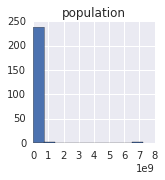

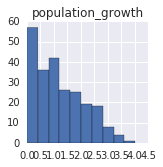

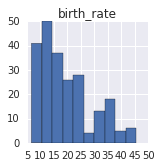

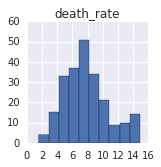

In [6]:
#Import pyplot module
import matplotlib.pyplot as plt
import seaborn as sns

#Displaying the plot in a Jupiter Notebook Cell
%matplotlib inline

#Generate a 2 by 2 grid of histograms
histo={1:"population",2:"population_growth",3:"birth_rate",4:"death_rate"}

for i,j in histo.items():
    fig=plt.figure(figsize=(5,5))
    ax=fig.add_subplot(2,2,i)    
    q9=("SELECT "+j+" FROM facts WHERE population is not 0 AND population is not 725649011")
    pd.read_sql_query(q9,conn).hist(ax=ax)
    plt.title(j)
    plt.show()
    #ax=pd.read_sql_query(q9,conn).hist()
    #ax=pd.read_sql_query(q9,conn).plot(kind="hist")

# NO IDEA HOW TO MAKE A 2 BY 2 GRID???

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f218ccad668>,
      dtype=object)

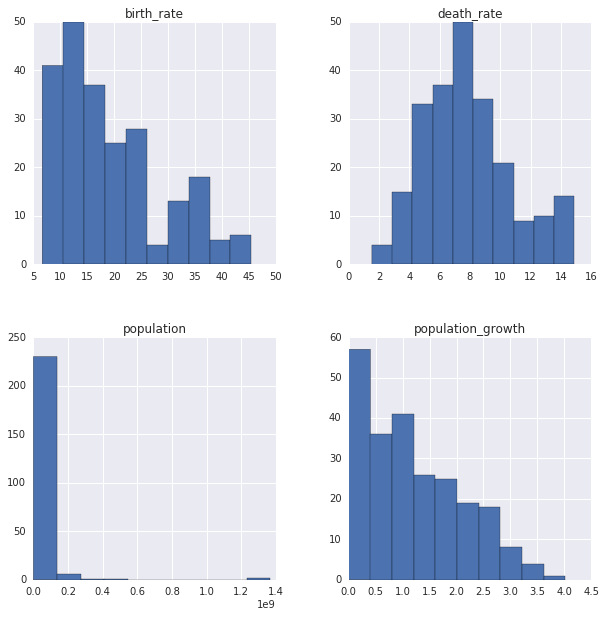

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

## Next Steps

In [10]:
#Which countries have the highest population density?
q10="SELECT name,cast(population as float)/cast(area as float) AS density FROM facts ORDER BY density DESC"
print(pd.read_sql_query(q10,conn))

                                              name       density
0                                            Macau  21168.964286
1                                           Monaco  15267.500000
2                                        Singapore   8141.279770
3                                        Hong Kong   6445.041516
4                                       Gaza Strip   5191.819444
5                                        Gibraltar   4876.333333
6                                          Bahrain   1771.859211
7                                         Maldives   1319.640940
8                                            Malta   1310.015823
9                                          Bermuda   1299.925926
10                                    Sint Maarten   1167.323529
11                                      Bangladesh   1138.069143
12                                        Guernsey    847.179487
13                                          Jersey    838.741379
14                       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f218cb20128>]],
      dtype=object)

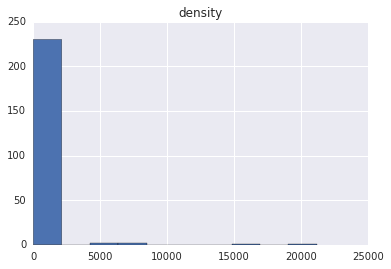

In [11]:
#Generate a histogram of population densities
q11="SELECT cast(population as float)/cast(area as float) AS density FROM facts WHERE population is not 0 AND population is not "
pd.read_sql_query(q10,conn).hist()